In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import nltk

In [7]:
import re

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import classification_report, accuracy_score

In [14]:
fake = pd.read_csv(r"C:\Users\22rit\OneDrive\Documents\Datasets\Fake.csv")

In [15]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [17]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

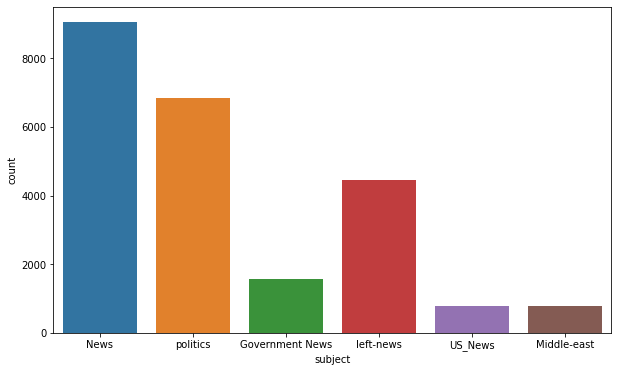

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject',data = fake)

In [19]:
real = pd.read_csv(r"C:\Users\22rit\OneDrive\Documents\Datasets\True.csv")

In [20]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [21]:
real.sample(5)

,title,text,subject,date
14805,Venezuela opposition says talks with governmen...,CARACAS (Reuters) - Venezuela s opposition sai...,worldnews,"November 14, 2017"
2971,House panel wants to know how climate change i...,WASHINGTON (Reuters) - U.S. lawmakers on the H...,politicsNews,"June 29, 2017"
21042,Teachers in Peru return to class as strike win...,LIMA (Reuters) - Teachers in Peru started retu...,worldnews,"September 4, 2017"
17463,"Iranians fear economic hardship, but united ag...",ANKARA (Reuters) - U.S. President Donald Trump...,worldnews,"October 14, 2017"
5806,Trump's Supreme Court nominee questions power ...,NEW YORK (Reuters) - Supreme Court nominee Jud...,politicsNews,"February 1, 2017"


In [22]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
    try :
        record = row.split('-',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except :
        unknown_publishers.append(index)

In [23]:
len(unknown_publishers)

222

In [24]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [25]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [26]:
real = real.drop(8970, axis=0)

In [27]:
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers :
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record = row.split('-',maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [28]:
real['publisher'] = publisher
real['text'] = tmp_text

In [29]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [30]:
real.shape

(21416, 5)

In [31]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [32]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [33]:
real['text'] = real['title']+" "+real['text']
fake['text'] = fake['title']+" "+fake['text']

In [34]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [35]:
real['class'] = 1
fake['class'] = 0

In [36]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [37]:
real = real[['text' , 'class']]

In [38]:
fake = fake[['text' , 'class']]

In [39]:
data = real.append(fake, ignore_index=True)

C:\Users\22rit\AppData\Local\Temp\ipykernel_15320\1474393329.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [40]:
data.sample(5)

,text,class
22476,montana dems hilariously troll reporter-slamm...,0
32869,lol! nancy pelosi: “i’m not sure if ironically...,0
14999,telefonica suspends customer service operation...,1
1838,"senate passes disaster aid, government funding...",1
6937,"duterte says felt rapport with trump, assures ...",1


In [41]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install backend dependencies did not run successfully.
  exit code: 1
  
  [290 lines of output]
    Using cached preshed-3.0.6-cp39-cp39-win_amd64.whl (112 kB)
    Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
    Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
    Using cached murmurhash-1.0.7-cp39-cp39-win_amd64.whl (18 kB)
    Using cached cymem-2.0.6-cp39-cp39-win_amd64.whl (36 kB)
    Using cached thinc-7.3.1.tar.gz (2.0 MB)
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'done'
    Using cached blis-0.4.1.tar.gz (1.8 MB)
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'done'
    Using cached wasabi-0.9.1-py3-none-any.whl (26 kB)
    Using cached srsly-1.0.5-cp39-cp39-win_amd64.whl (177 kB)
    Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)
    Using cached plac-1.1.3-py2.py3-none-any.whl

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\22rit\appdata\local\temp\pip-req-build-t43wa3pm
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7691 sha256=0445f23f81da492ee68c953822e3028676b699934224fb2653e9fa7df63e54d2
  Stored in directory: C:\Users\22rit\AppData\Local\Temp\pip-ephem-wheel-cache-1xbd9547\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\22rit\AppData\Local\Temp\pip-req-build-t43wa3pm'


In [44]:
import preprocess_kgptalkie as ps

In [46]:
data['text'].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44892    mcpain john mccain furious that iran treated u...
44893    justice yahoo settles email privacy classactio...
44894    sunnistan us and allied safe zone plan to take...
44895    how to blow 700 million al jazeera america fin...
44896    10 us navy sailors held by iranian military si...
Name: text, Length: 44897, dtype: object

In [47]:
#Example
ps.remove_special_chars('This #is @our Mino$r Project&')

'This is our Minor Project'

In [48]:
data.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [49]:
import gensim

In [50]:
y = data['class'].values

In [53]:
x = [d.split() for d in data['text'].tolist()]

In [54]:
type(x)

list

In [55]:
type(x[0])

list

In [59]:
DIM = 100

In [61]:
w2v_model = gensim.models.Word2Vec(sentences=x, vector_size=DIM, window=10, min_count=1)

In [68]:
len(w2v_model.wv.key_to_index)

375373

In [72]:
w2v_model.wv

In [78]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7378599047660828),
 ('malaysia', 0.7283291816711426),
 ('india,', 0.7013982534408569),
 ('pakistan,', 0.6851116418838501),
 ('china,', 0.6625625491142273),
 ('indian', 0.6529113054275513),
 ('china', 0.6475859880447388),
 ('beijing', 0.6377558708190918),
 ('islamabad', 0.6344510912895203),
 ('australia,', 0.6337688565254211)]

In [79]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [81]:
x = tokenizer.texts_to_sequences(x)

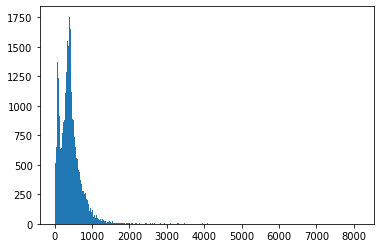

In [86]:
plt.hist([len(i) for i in x], bins = 500)
plt.show()

In [87]:
nos = np.array([len(i) for i in x])
len(nos[nos>1000])

1603

In [88]:
maxlen = 1000
x = pad_sequences(x,maxlen=maxlen)

In [89]:
len(x[101])

1000

In [90]:
vocab_size = len(tokenizer.word_index) + 1

In [91]:
vocab = tokenizer.word_index

In [98]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size,100))
    for word,i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [99]:
embedding_vectors = get_weight_matrix(w2v_model)

In [100]:
embedding_vectors.shape

(375374, 100)

In [104]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim = DIM, weights = [embedding_vectors], input_length = maxlen, trainable = False ))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [105]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 100)         37537400  
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,654,777
Trainable params: 117,377
Non-trainable params: 37,537,400
_________________________________________________________________


In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [107]:
model.fit(x_train, y_train, validation_split = 0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 510s 690ms/step - loss: 0.1907 - acc: 0.9241 - val_loss: 0.0930 - val_acc: 0.9706
Epoch 2/6
737/737 [==============================] - 517s 702ms/step - loss: 0.0630 - acc: 0.9788 - val_loss: 0.0482 - val_acc: 0.9838
Epoch 3/6
737/737 [==============================] - 495s 671ms/step - loss: 0.0365 - acc: 0.9887 - val_loss: 0.0301 - val_acc: 0.9903
Epoch 4/6
737/737 [==============================] - 482s 655ms/step - loss: 0.0298 - acc: 0.9896 - val_loss: 0.0447 - val_acc: 0.9854
Epoch 5/6
737/737 [==============================] - 441s 599ms/step - loss: 0.0253 - acc: 0.9919 - val_loss: 0.0161 - val_acc: 0.9947
Epoch 6/6
737/737 [==============================] - 471s 639ms/step - loss: 0.0109 - acc: 0.9968 - val_loss: 0.0155 - val_acc: 0.9951


In [108]:
y_pred = (model.predict(x_test)>=0.5).astype(int)

In [109]:
accuracy_score(y_test, y_pred)

0.9935857461024499

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5846
           1       0.99      0.99      0.99      5379

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [111]:
a=["this is a news"]

In [112]:
x_test

array([[     0,      0,      0, ...,   2261,   1233,   1952],
       [     0,      0,      0, ...,    202,    184,   4272],
       [     0,      0,      0, ...,      6,    286,    861],
       ...,
       [     0,      0,      0, ...,     13, 172981,    367],
       [     0,      0,      0, ...,      4,   1931,   4006],
       [     0,      0,      0, ...,    184,   2431,   4272]])

In [113]:
a=["this is a news"]
a=tokenizer.texts_to_sequences(a)
a=x = pad_sequences(a,maxlen=maxlen)

In [114]:
model.predict(a)

array([[0.01595184]], dtype=float32)

In [115]:
(model.predict(a)>=0.5).astype(int)

array([[0]])

In [116]:
b=["Delhi logged 1,414 fresh Covid-19 cases and one death on Tuesday. Even though the cases were 31 per cent more than Monday, the positivity rate decreased 5.97 per cent. The total number of cases in Delhi rose to 18,87,050 and the death toll increased to 26,176"]
b=tokenizer.texts_to_sequences(b)
b=pad_sequences(b,maxlen=maxlen)
(model.predict(b)>=0.5).astype(int)

array([[1]])

In [117]:
c=["hosrse sleeps with 3 legs"]
c=tokenizer.texts_to_sequences(c)
c=pad_sequences(c,maxlen=maxlen)
(model.predict(c)>=0.5).astype(int)

array([[0]])